In [2]:
!pip install pydataset

     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     --------------------------------------- 0.1/15.9 MB 660.6 kB/s eta 0:00:25
     --------------------------------------- 0.1/15.9 MB 770.8 kB/s eta 0:00:21
     --------------------------------------- 0.1/15.9 MB 804.6 kB/s eta 0:00:20
     --------------------------------------- 0.2/15.9 MB 706.2 kB/s eta 0:00:23
     --------------------------------------- 0.2/15.9 MB 798.5 kB/s eta 0:00:20
      -------------------------------------- 0.2/15.9 MB 728.8 kB/s eta 0:00:22
      -------------------------------------- 0.2/15.9 MB 758.5 kB/s eta 0:00:21
      -------------------------------------- 0.2/15.9 MB 656.0 kB/s eta 0:00:24
      -------------------------------------- 0.3/15.9 MB 706.2 kB/s eta 0:00:23
      -------------------------------------- 0.4/15.9 MB 765.8 kB/s eta 0:00:21
      -------------------------------------- 0.4/15.9 MB

In [9]:
#Step 1: Importing Modules
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:

#Step 2: Loading Dataset
#loading our preloaded dataset into a dataframe df
df = data('bioChemists')
 
#printing our dataframe
df.head()


,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26


In [19]:

#Step 3: Assigning values for Independent and dependent variables respectively
#creating columns for each value in fem and assigning 1 for positve and 0 for negative
dummy = pd.get_dummies(df['fem'])
#adding the resultant icolumns to our dataframe using concat() method
df = pd.concat([df, dummy], axis = 1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women
1,0,Men,Married,0,2.52,7,1,0
2,0,Women,Single,0,2.05,6,0,1
3,0,Women,Single,0,3.75,6,0,1
4,0,Men,Married,1,1.18,3,1,0
5,0,Women,Single,0,3.75,26,0,1


In [20]:
#repeat the same for the values of mar columns
dummy = pd.get_dummies(df['mar'])
df = pd.concat([df, dummy], axis = 1)
 
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


In [17]:
#independent variable
x = df[['Men', 'kid5', 'phd', 'ment', 'art']]
 
#dependent variable
y = df['Married']


In [6]:
#Step 4: Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


#Step 5: Creating Model and checking accuracy
#creating our linear discrimanant analysis model 
clf = LinearDiscriminantAnalysis()
 
#checking for the model accuracy using score method
clf.fit(x_train, y_train).score(x_train, y_train)

0.728125

In [7]:
# Checking accuracy on the training set
train_accuracy = clf.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

# Step 6: Testing the Model
y_pred = clf.predict(x_test)

# Step 7: Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Training Accuracy: 0.728125

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



In [10]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[ 50  39]
 [ 41 145]]


In [11]:
# Calculating accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.7090909090909091


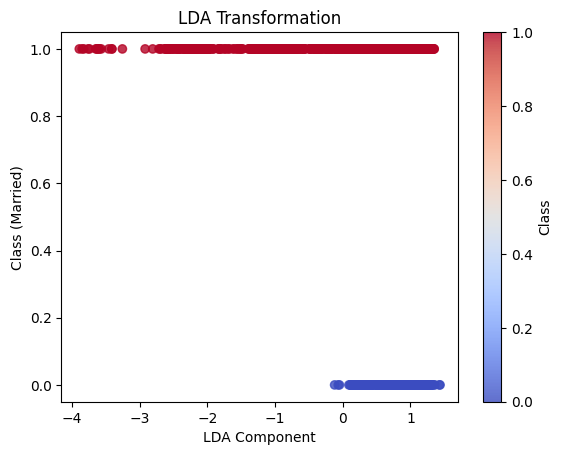

In [12]:
# Optional: Visualizing LDA Transformation
lda_transformed = clf.transform(x)
plt.scatter(lda_transformed, y, c=y, cmap='coolwarm', alpha=0.8)
plt.title("LDA Transformation")
plt.xlabel("LDA Component")
plt.ylabel("Class (Married)")
plt.colorbar(label="Class")
plt.show()
